In [1]:
# ------------------------------------------------------------------------------
# A notebook where the hold-out data is used for monitoring progress.
# ------------------------------------------------------------------------------

import torch
import torch.nn as nn
import torch.optim as optim

from ptt.data.dataset_classification import CIFAR10
from ptt.models.small_cnn import SmallCNN
from ptt.data.pytorch_dataset import ImgClassificationDataset
from ptt.agents.classification_agent import ClassificationAgent
from ptt.eval.result import Result
from ptt.visualization.plot_results import plot_results

In [2]:
config = {'batch_size':32, 'lr':1e-3, 'momentum':0.9, 'device':'cuda:1', 'nr_epochs': 5, 'tracking_interval': 1}

In [3]:
# Fetch data, transform to PyTorch format and build dataloaders
data = CIFAR10()
datasets = {'train': ImgClassificationDataset(data, ix_lst=None, resize=None, norm=data.x_norm),
    'test': ImgClassificationDataset(data, ix_lst=data.hold_out_ixs, resize=None, norm=data.x_norm)}
dataloaders = dict()
for split, ds in datasets.items():
    shuffle = not(split == 'test')
    dataloaders[split] = torch.utils.data.DataLoader(ds, batch_size=config['batch_size'], shuffle=shuffle)

In [4]:
# Get model
model = SmallCNN(input_shape=data.input_shape, output_shape=data.output_shape)
model.to(config['device'])


SmallCNN(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [5]:
# Define criterion and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=config['lr'], momentum=config['momentum'])

In [6]:
# Train model
results = Result(name='training_trajectory')
agent = ClassificationAgent(config=config, base_criterion=criterion, verbose=True)
agent.train(results, model, optimizer, trainloader=dataloaders['train'], dataloaders=dataloaders)

Epoch 0 data train loss 2.3021214695739745
Epoch 0 data test loss 2.3021317998250326
Epoch 1 data train loss 1.698789750442505
Epoch 1 data test loss 1.6967153809229534
Epoch 2 data train loss 1.495256079788208
Epoch 2 data test loss 1.4950744886080425
Epoch 3 data train loss 1.3685476108169556
Epoch 3 data test loss 1.370463724199931
Epoch 4 data train loss 1.2929138510131837
Epoch 4 data test loss 1.2961451235453287
Epoch 5 data train loss 1.2637382370376586
Epoch 5 data test loss 1.2697446328639985


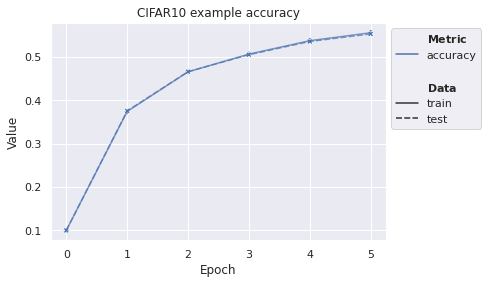

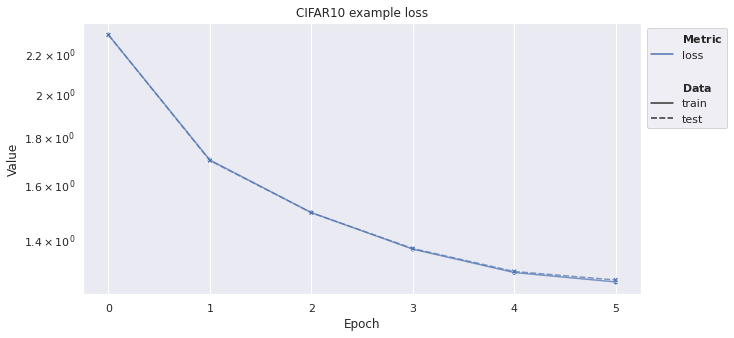

In [7]:
# Visualize results
save_path = os.path.join('test', 'test_obj')
plot_results(results, measures=['accuracy'], save_path=save_path, title='CIFAR10 example accuracy', ending='.png')
plot_results(results, measures=['loss'], save_path=save_path, ylog=True, title='CIFAR10 example loss', ending='.png')